In [1]:
!pip install librosa
!pip install tensorflow
!pip install keras

In [4]:
import librosa
import librosa.display
import os

In [5]:
mylist= os.listdir('RawData/')

In [6]:
type(mylist)

list

In [7]:
print(mylist[2])

OSR_us_000_0030_8k.wav


In [8]:
data, sampling_rate = librosa.load('RawData/OSR_us_000_0010_8k.wav')

Populating the interactive namespace from numpy and matplotlib


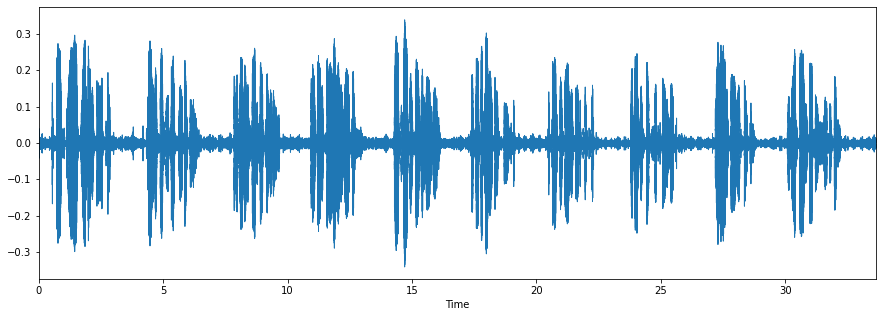

In [9]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

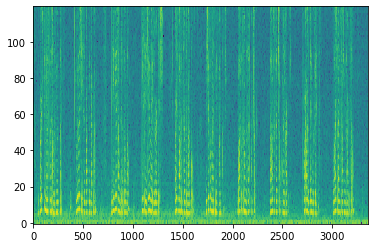

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('RawData/OSR_us_000_0010_8k.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

Populating the interactive namespace from numpy and matplotlib
* recording
* done recording
Speech to text:
-----------------
hey how are you doing


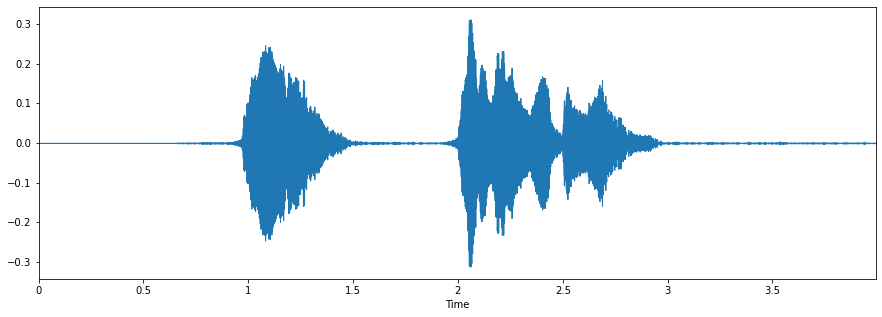

In [49]:
%pylab inline
import pyaudio
import wave
import librosa
import librosa.display
import os
import pandas as pd
import speech_recognition as sr


CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output12.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

data, sampling_rate = librosa.load('output12.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

r = sr.Recognizer()
with sr.AudioFile(WAVE_OUTPUT_FILENAME) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print('Speech to text:\n' + '-'*17)
    print(text)





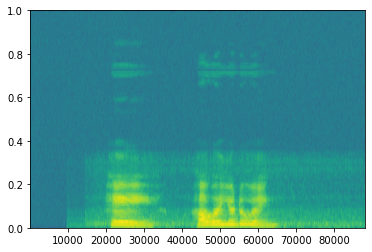

In [50]:

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


#sr,x = scipy.io.wavfile.read('output12.wav')

## Parameters: 10ms step, 30ms window
#nstep = int(sr * 0.01)
#nwin  = int(sr * 0.03)
#nfft = nwin

#window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
#nn = range(nwin, len(x), nstep)

#X = np.zeros( (len(nn), nfft//2) )

#for i,n in enumerate(nn):
#    xseg = x[n-nwin:n]
#    z = np.fft.fft(window * xseg, nfft)
#    X[i,:] = np.log(np.abs(z[:nfft//2]))

#plt.imshow(X.T, interpolation='nearest',
#    origin='lower',
#    aspect='auto')

#plt.show()

data, sampling_rate = scipy.io.wavfile.read('output12.wav')
#Left channel
sampling_rate = sampling_rate[:,0]

first = sampling_rate[:int(data*200)]

#Window length and step size
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, data=data)
plt.show()